In [1]:
import json

import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
trajectory = "sim.h5"
stage = "interphase"

context_history = []

with h5py.File(trajectory, "r") as store:
    snapshots = store["snapshots"][stage]

    for step in snapshots[".steps"]:
        sample = snapshots[step]
        context = json.loads(sample["context"][()])
        context_history.append({"step": int(step), **context})

context_history = pd.DataFrame.from_records(context_history)

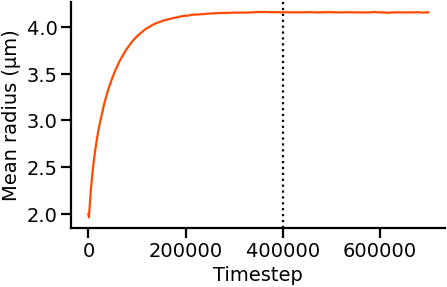

In [3]:
annotated_step = 400_000

fig, ax = plt.subplots(figsize=(2.3, 1.5))
x = context_history["step"]
y = np.cbrt(context_history["wall_semiaxes"].map(np.prod))
ax.plot(x, y)
ax.axvline(annotated_step, ls=":")
ax.set_xlabel("Timestep")
ax.set_ylabel(r"Mean radius (μm)")
pass